## Building a neural network to predict the energy production of a solar system.
### *The data corresponds to a 1MW solar system installed in the parking lot of a spanish university.

In [1]:
#import libraries
library(neuralnet)
library(NeuralNetTools)
library(readxl)


Warning message:
"package 'neuralnet' was built under R version 3.6.3"Warning message:
"package 'NeuralNetTools' was built under R version 3.6.3"Warning message:
"package 'readxl' was built under R version 3.6.3"

In [2]:
# read dataset
df <- read_excel("libro3.xlsx")
head(df)

# Rad = Radiation (W/m2)
# ta = Ambient Temperature (ºC)
# tm = Module Temperature
# prod = Production Wh


rad,ta,tm,prod
50.00,11,9.00,8403.29
15.00,11,9.00,1751.71
114.28,12,11.01,20094.24
66.00,12,13.00,12228.32
36.97,12,13.00,6939.26
33.92,12,11.01,6277.08


In [ ]:
scaleddf<-scale(df[1:3])
scaleddf<-cbind(scaleddf,df$prod)
colnames(scaleddf)<-c( 'rad','ta','tm','prod')
head(scaleddf,3)


In [9]:
# Create a function for normalizing the data

normalize <- function(x) {
    return ((x - mean(x)) / sd(x))
}
norm_df <- as.data.frame(lapply(df,normalize))

# Take a look at the normalized dataframe
head(norm_df)

rad,ta,tm,prod
-1.1614626,-2.724261,-2.055514,-1.206450
-1.2652832,-2.724261,-2.055514,-1.305040
-0.9707887,-2.455880,-1.855603,-1.033167
-1.1140018,-2.455880,-1.657680,-1.149756
-1.2001135,-2.455880,-1.657680,-1.228150
-1.2091607,-2.455880,-1.855603,-1.237965


In [ ]:
# Split the data in train and test sets

x<-runif(nrow(norm_df))
df_train<-norm_df[which(x<.7),]
df_test<-norm_df[which(x>=.7),]

In [16]:
# Check the number of values in each df
nrow(df_train)
nrow(df_test)

[1] 1703

[1] 705

In [17]:
# Introduce the formula. First indicate the variable that it's going to be predicted and
# then the attributes that are used for it. 
f<-'prod~rad+ta+tm'

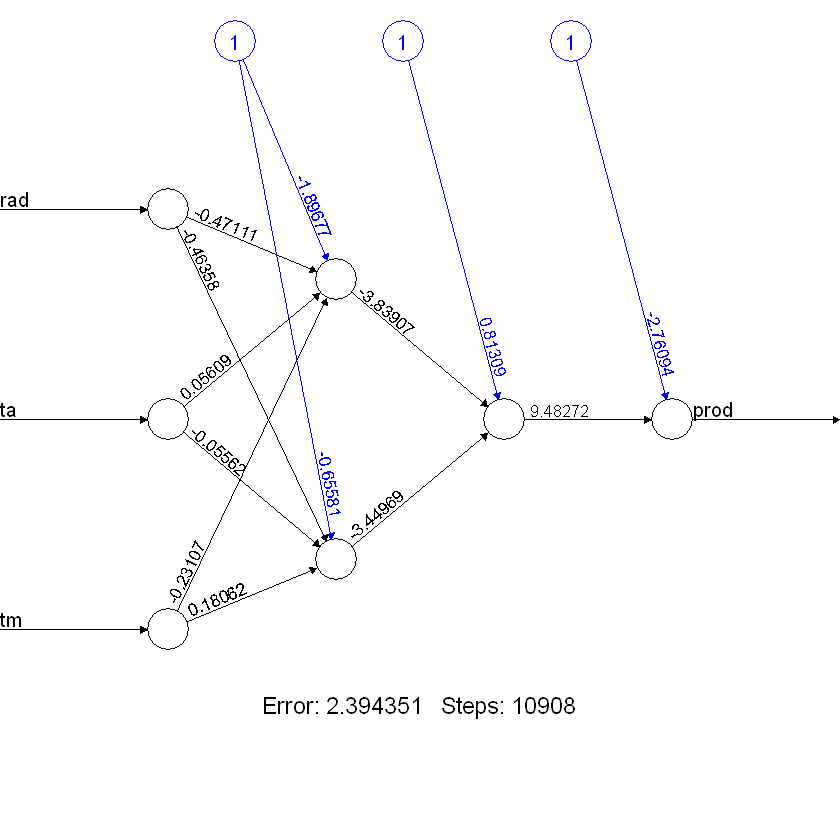

In [18]:
# Using the neuralnet function we build a net of two hidden layers, first one with two neurons and second one with one.
# This model is trained with df_train
nn<-neuralnet(formula=f,data=df_train,stepmax=1e7,threshold = .1, hidden = c(2,1), rep = 10)

# Plot the net to check the weights used. If rep='best' the repetition with the smallest error will be plotted.
plot(nn, rep = "best")

In [20]:
# Now the model is tested using the compute method and df_test values
nn.results <- compute(nn, df_test)
df_test<-data.frame(df_test)
results <- data.frame(actual = df_test$prod, prediction = nn.results$net.result)
head(results)

,actual,prediction
2,-1.3050396,-1.3043782
4,-1.1497556,-1.1619946
6,-1.2379647,-1.2507687
18,-0.8205346,-0.8121285
21,-1.1554087,-1.1272764
23,-1.1747201,-1.2001656


[1] 705

In [21]:
# Create a function to denormalize the results

denormalize<-function(x){
    media=mean(df$prod)
    desv=sd(df$prod)
    return (x*desv+media)
}

results2 <-as.data.frame(lapply(results,denormalize))
head(results2)

actual,prediction
1751.71,1796.332
12228.32,11402.586
6277.08,5413.222
34440.01,35007.151
11846.92,13744.931
10544.03,8827.285


In [23]:
# Create a function to calculate the normalized mean squared error of the neuralnet

nmae <- function (x){
    e =((sum(x[1]-x[2])/nrow(x))*(1/mean(x[,1])))*100
    e=round(e,4)
    e=paste(e, "%", sep=" ")
    print(e)
    }

nmae(results2)

[1] "-0.1222 %"


In [34]:
# R^2 calculation
rsq <- function (x, y) cor(x, y) ^ 2 
r2 <-rsq(results2$actual,results2$prediction)

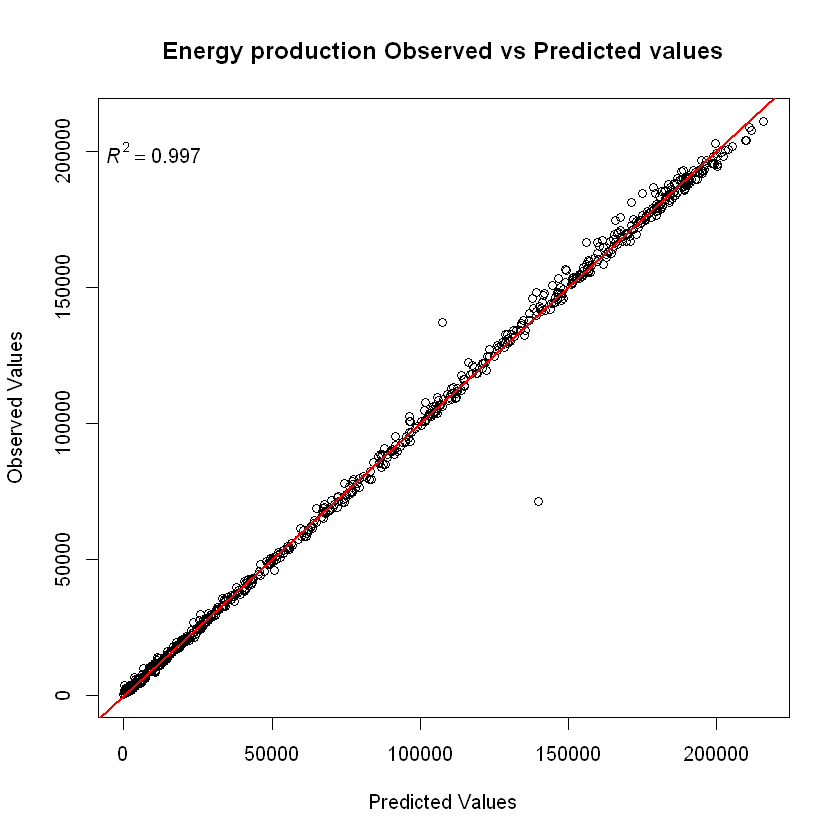

In [39]:
# Plotting the results

plot(results2$actual,                                # Draw plot using Base R
     results2$prediction,
     main = 'Energy production Observed vs Predicted values',
     xlab = "Predicted Values",
     ylab = "Observed Values")

abline(a = 0,                                        # Add straight line
       b = 1,
       col = "red",
       lwd = 2)

mylabel = bquote(italic(R)^2 == .(format(r2, digits = 3)))
text(x = 10000, y = 200000, labels = mylabel)

## Conclusion: a simple neuralnet was created to predict energy production values. A normalized mean squared error of -0.122% was achieved. With this method one can try which architecthure of the neuralnet gives better results.